In [1]:
# Use if pillow not installed
# !pip install pillow

In [2]:
import colorsys;
from PIL import Image
import numpy as np

In [2]:
imgOrg = Image.open('mona.jpg')

#takes in a picture expected to be RGB not RGBA and a threshold for setting pixel to black or white
def high_contrast(picture, thres):
    pic = picture.copy()
    pixels = pic.load() # create the pixel map
    print(pixels);
    max = 0
    for i in range(pic.size[0]): # for every pixel:
        for j in range(pic.size[1]):
            #print(pixels[i,j])
            r,g,b = pixels[i,j];
            average = int((r + b + g) / 3)
            if max < average:
                max = average;
            pixels[i,j] = (average, average, average)
            #print(str(r) + " " + str(g) + " " + str(b))
    #pic.show()
    for i in range(pic.size[0]): # for every pixel:
        for j in range(pic.size[1]):
            #print(pixels[i,j])
            r,g,b = pixels[i,j];
            scaled = int(255 * r / max)
            if (scaled < thres) :
                scaled = 0
            else:
                scaled = 255
            pixels[i,j] = (scaled, scaled, scaled)
    return pic

high_contrast(imgOrg, 100)


NameError: name 'Image' is not defined

In [8]:
def blank(picture):
    pic = picture.copy();
    pixels = pic.load()
    for i in range(pic.size[0]): # for every pixel:
        for j in range(pic.size[1]):
            #print(pixels[i,j])
            pixels[i,j] = (255, 255, 255)
    return pic

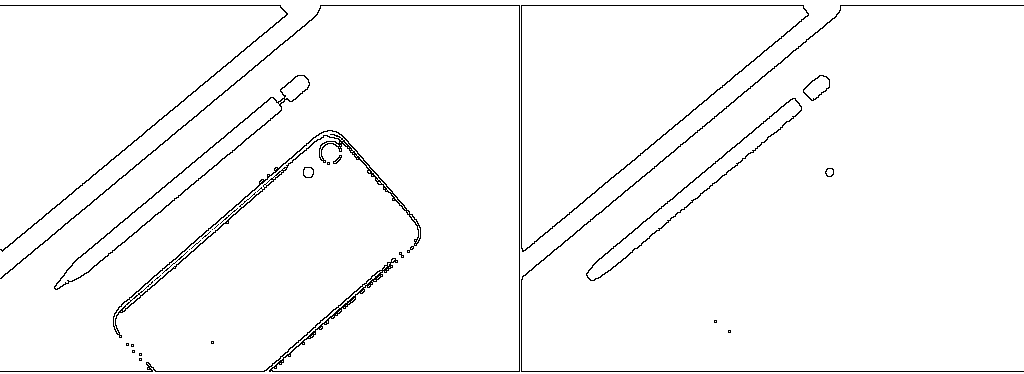

In [40]:
def outline(pic, thres):
    highCon = high_contrast(pic, thres)
    out = blank(pic)

    highConPixels = highCon.load()
    outPixels = out.load()
    
    for i in range(pic.size[0]): # for every pixel:
        for j in range(pic.size[1]):
            #print(pixels[i,j])
            if highConPixels[i,j] == (0,0,0):
                if (i == 0):
                    if (j == 0):
                        if highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    elif (j == pic.size[1] -1):
                        if highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    else:
                        if highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255) or highConPixels[i+1,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                elif (i == pic.size[0] -1):
                    if (j == 0):
                        if highConPixels[i-11,j] == (255,255,255) or highConPixels[i-11,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    elif (j == pic.size[1] -1):
                        if highConPixels[i-1,j] == (255,255,255) or highConPixels[i-1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    else:
                        if highConPixels[i-1,j] == (255,255,255) or highConPixels[i-1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255) or highConPixels[i-1,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                else:
                    if (j == 0):
                        if highConPixels[i-11,j] == (255,255,255) or highConPixels[i-11,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255) or highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    elif (j == pic.size[1] -1):
                        if highConPixels[i-1,j] == (255,255,255) or highConPixels[i-1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255) or highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j-1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    else:
                        if highConPixels[i-1,j] == (255,255,255) or highConPixels[i-1,j-1] == (255,255,255) or highConPixels[i-1,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255) or highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255) or highConPixels[i+1,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
    return out

outline(imgOrg, 150)
    